In [1]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Flatten, Reshape

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size = 3, padding = "same", input_shape = (28, 28, 1), activation = "relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same"))
autoencoder.add(Conv2D(8, kernel_size=3, activation="relu", padding="same"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same"))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding = "same", activation="relu"))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))

In [5]:
# 전체구조 확인
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 8)          

In [6]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer="adam", loss = "binary_crossentropy")

In [7]:
autoencoder.fit(X_train, X_train, epochs = 50, batch_size=128,
                validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 213us/step - loss: 0.2186 - val_loss: 0.1443
Epoch 2/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.1310 - val_loss: 0.1201
Epoch 3/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1163 - val_loss: 0.1114
Epoch 4/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1098 - val_loss: 0.1064
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1061 - val_loss: 0.1034
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1032 - val_loss: 0.1012
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1008 - val_loss: 0.0987
Epoch 8/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0991 - val_loss: 0.0971
Epoch 9/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0977 - val_loss: 0.0957
E

In [8]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size = 5)

In [10]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기

In [11]:
plt.figure(figsize = (7,2)) # 출력 이미지 크기 정하기

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

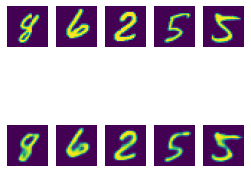

In [12]:
for i, image_idx in enumerate(random_test):
  # 랜덤으로  뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i + 1)

  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis("off")
  ax = plt.subplot(2, 7, 7 + i + 1)

  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis("off")

plt.show()